# <font color='Blue'> Analysis of Chronic Kidney Disease Progression in Patients </font>

###### Chronic kidney disease,  or CKD, is a condition characterized by a gradual loss of kidney function over time. Early detection can help prevent the progression of kidney disease to kidney failure

For this task, you are given a set of longitudinal data (attached) of different lab measurements for patients diagnosed with chronic kidney disease (CKD). Furthermore, you are also given the information whether these patients progress in their CKD stage or not in the future. Using this dataset, you are required to come up with a solution to predict whether a patient will progress in CKD staging given the patient's past longitudinal information.

In [1]:
import  MyToolSet as my_internal_func


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### 1. Data Import

In [2]:
# --------------------------- Import individual files and process data for quality checks


dframe_demographics=pd.read_csv('T_demo.csv')
print('--------------------------Rows fetched---->',len(dframe_demographics))
print('Unique Patients--->',len(dframe_demographics['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_demographics.groupby('id').size())

dframe_creatinine=pd.read_csv('T_creatinine.csv')
print('Rows fetched---->',len(dframe_creatinine))
print('Unique Patients--->',len(dframe_creatinine['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_creatinine.groupby('id').size())

dframe_bloodpressure_d=pd.read_csv('T_DBP.csv')
print('Rows fetched---->',len(dframe_bloodpressure_d))
print('Unique Patients--->',len(dframe_bloodpressure_d['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_bloodpressure_d.groupby('id').size())

dframe_bloodpressure_s=pd.read_csv('T_SBP.csv')
print('Rows fetched---->',len(dframe_bloodpressure_s))
print('Unique Patients--->',len(dframe_bloodpressure_s['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_bloodpressure_s.groupby('id').size())

dframe_bloodsugar=pd.read_csv('T_glucose.csv')
print('Rows fetched---->',len(dframe_bloodsugar))
print('Unique Patients--->',len(dframe_bloodsugar['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_bloodsugar.groupby('id').size())

dframe_hglob=pd.read_csv('T_HGB.csv')
print('Rows fetched---->',len(dframe_hglob))
print('Unique Patients--->',len(dframe_hglob['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_hglob.groupby('id').size())

dframe_lipoprotein=pd.read_csv('T_ldl.csv')
print('Rows fetched---->',len(dframe_lipoprotein))
print('Unique Patients--->',len(dframe_lipoprotein['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_lipoprotein.groupby('id').size())

dframe_medications=pd.read_csv('T_meds.csv')
print('Rows fetched---->',len(dframe_medications))
print('Unique Patients--->',len(dframe_medications['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_medications.groupby('id').size())

dframe_target=pd.read_csv('T_stage.csv')
print('Rows fetched---->',len(dframe_target))
print('Unique Patients--->',len(dframe_target['id'].unique()))
print('Lab records per patient--------------')
# print(dframe_target.groupby('id').size())

--------------------------Rows fetched----> 300
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 1439
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 1821
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 1809
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 1556
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 2025
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 1261
Unique Patients---> 300
Lab records per patient--------------
Rows fetched----> 2181
Unique Patients---> 272
Lab records per patient--------------
Rows fetched----> 300
Unique Patients---> 300
Lab records per patient--------------


In [3]:
## ------------------------------- Merge All test Results Information into one source.

from functools import reduce
list_df = [dframe_creatinine, dframe_bloodpressure_d, dframe_bloodpressure_s, dframe_bloodsugar, dframe_hglob,dframe_lipoprotein]

dframe_all_test_results = list_df[0]
for df_ in list_df[1:]:
    dframe_all_test_results =pd.DataFrame( dframe_all_test_results.merge(df_,how='outer', on=['id','time']))
print('\n\n All lab test results Dataframe size---->',dframe_all_test_results.shape)

dframe_all_test_results.sort_values(['id','time'],inplace=True)

dframe_all_test_results.to_csv( 'output/dframe_all_test_results.csv',index=False)

# Smoothen the number of days within a reasonable window of one month to reduce variance of observation 

  
dframe_all_test_results['Time Window']=dframe_all_test_results['time'].apply(lambda x:round(x/21))

dframe_all_test_results.head(10)



 All lab test results Dataframe size----> (4761, 8)


,id,Creatinine,time,DBP,SBP,Glucose,HGB,Lipoprotein,Time Window
0,0,1.29,0,95.32,134.11,6.24,13.51,161.49,0
1439,0,NaN,98,83.98,133.75,NaN,NaN,NaN,5
1,0,1.15,107,NaN,NaN,7.20,13.39,111.39,5
1440,0,NaN,279,65.97,125.08,NaN,NaN,NaN,13
2,0,1.44,286,NaN,NaN,7.01,12.84,NaN,14
1441,0,NaN,380,83.41,136.75,NaN,NaN,NaN,18
3,0,1.23,382,NaN,NaN,6.89,13.32,157.90,18
1442,0,NaN,475,86.39,130.50,NaN,NaN,NaN,23
4,0,1.08,580,87.64,154.91,5.62,NaN,NaN,28
1443,0,NaN,678,78.39,154.28,NaN,NaN,NaN,32


In [4]:
# The CKD-EPI (Chronic Kidney Disease Epidemiology Collaboration) equation was developed
# in an effort to create a more precise formula to estimate glomerular filtrate rate (GFR) from serum creatinine 
# and other readily available clinical parameters,


def eGFScore(row):
    k= 0.7 if row['gender']=='Female' else 0.9
    alpha=-0.329 if row['gender']=='Female' else -0.411
    f1=1.018 if row['gender']=='Female' else 1
    f2=1.159 if row['race']=='Black' else 1
    
    egfr=141* (min(row['Creatinine']/k,1))**alpha * (max(row['Creatinine']/k,1))**(-1.209)*  0.993**row['age']*f1*f2
    return round(egfr)
         
    
def CKD_stage(x):
    if x>=90: return 1
    elif 60<=x<=89: return 2
    elif 45<=x<=59: return 3
    elif 30<=x<=44 :return 3.5
    elif 15<=x<=29: return 4
    elif x<=15: return 5
    else: return 0


In [5]:
##-------------Smoothening the variance caused by days elapsed. Making it a three week aggregation data
dframe_smoothened_test_results=pd.DataFrame(dframe_all_test_results.groupby(['id','Time Window'],as_index=False)['time'].nunique())

for func in ['min','mean','max']:
    dframe_smoothened_test_results_temp=pd.DataFrame(dframe_all_test_results.groupby(['id','Time Window'],as_index=False).agg(func))
    dframe_smoothened_test_results_temp.columns=['id','Time Window','Creatinine_'+func,'time_'+func,'DBP_'+func,'SBP_'+func,'Glucose_'+func,'HGB_'+func,'Lipoprotein_'+func]
    del(dframe_smoothened_test_results_temp['time_'+func])
    dframe_smoothened_test_results=dframe_smoothened_test_results.merge(dframe_smoothened_test_results_temp,on=['id','Time Window'])

del(dframe_smoothened_test_results['time'])
    
                   
print(dframe_smoothened_test_results.columns)



Index(['id', 'Time Window', 'Creatinine_min', 'DBP_min', 'SBP_min',
       'Glucose_min', 'HGB_min', 'Lipoprotein_min', 'Creatinine_mean',
       'DBP_mean', 'SBP_mean', 'Glucose_mean', 'HGB_mean', 'Lipoprotein_mean',
       'Creatinine_max', 'DBP_max', 'SBP_max', 'Glucose_max', 'HGB_max',
       'Lipoprotein_max'],
      dtype='object')


In [6]:


##-------------------- Imputing non avialable information of lab results on certain days wih previous available data

dframe_all_test_results.update(dframe_all_test_results.sort_values(["id","time"]).groupby("id").ffill())
dframe_smoothened_test_results.update(dframe_smoothened_test_results.sort_values(["id","Time Window"]).groupby("id").ffill())

dframe_all_test_results.to_csv( 'output/dframe_imputed_all_test_results.csv',index=False)
dframe_smoothened_test_results.to_csv( 'output/dframe_smoothened_test_results.csv',index=False)
print(len(dframe_all_test_results.id.unique()))



300


In [7]:
#------------- Linking patient demographics with medication history and disease outcomes

dframe_demo_alltestresults=dframe_demographics.merge(dframe_all_test_results,how='outer',on='id').merge(dframe_target,how='outer',on='id')
dframe_demo_alltestresults['eGFR']=dframe_demo_alltestresults.apply(eGFScore,axis=1)

print(dframe_demo_alltestresults.shape)
print(len(dframe_demo_alltestresults.id.unique()))
# Determine whether at t=0 patients have pre-existing conditions.
    
dframe_demo_alltestresults['CKD(t=0)']=dframe_demo_alltestresults.apply(lambda x: CKD_stage(x['eGFR']) if x['time']==0 else 0 ,axis=1)
dframe_demo_alltestresults['Dieabetes(t=0)']=dframe_demo_alltestresults.apply(lambda x: 1 if x['Glucose']>=7.0 and x['time']==0 else 0,axis=1)
dframe_demo_alltestresults['Cholestrol(t=0)']=dframe_demo_alltestresults.apply(lambda x: 1 if x['Lipoprotein']>=100 and x['time']==0 else 0,axis=1)
dframe_demo_alltestresults['Hyper Tension(t=0)']=dframe_demo_alltestresults.apply(lambda x: 1 if x['SBP']>=130 and x['DBP']>=80 and x['time']==0 else 0,axis=1)
dframe_demo_alltestresults['Hemoglobin(t=0)']=dframe_demo_alltestresults.apply(lambda x: 1 if x['HGB']<=(13.2 if x['gender']=='Male' else 11.6)  and x['time']==0 else 0,axis=1)
dframe_demo_alltestresults['t=0']=dframe_demo_alltestresults.groupby('id')['time'].transform(min)
dframe_demo_alltestresults['t=n']=dframe_demo_alltestresults.groupby('id')['time'].transform(max)
dframe_demo_alltestresults['period']=dframe_demo_alltestresults['t=n']-dframe_demo_alltestresults['t=0']
# dframe_temp=pd.DataFrame(dframe_demo_alltestresults[dframe_demo_alltestresults.time==0][['id','Creatinine','SBP','HGB','Glucose','Lipoprotein']],columns=['id','Creatinine_baseline','SBP_baseline','HGB_baseline','Glucose_baseline','Lipoprotein_baseline'])
# print(dframe_temp.shape)
# dframe_demo_alltestresults=dframe_demo_alltestresults.merge(dframe_temp,on='id',how='inner')
# print(dframe_demo_alltestresults.shape)
# for col in ['Creatinine','SBP','HGB','Glucose','Lipoprotein']:
# #     dframe_demo_alltestresults[col+'_next']=dframe_demo_alltestresults.groupby('id')[col].shift(-1)
# #     dframe_demo_alltestresults[col+'_delta']=dframe_demo_alltestresults[col+'_next']-dframe_demo_alltestresults[col]
    
#     dframe_demo_alltestresults[col+'_change from baseline']=dframe_demo_alltestresults[col]/dframe_demo_alltestresults[col+'_baseline']


dframe_demo_alltestresults.to_csv( 'output/dframe_demo_alltestresults.csv',index=False)
dframe_medication_with_outcomes=dframe_medications.merge(dframe_target,how='right',on='id')
dframe_demo_with_medication=dframe_demographics.merge(dframe_medication_with_outcomes,how='left',on='id').merge(dframe_demo_alltestresults[dframe_demo_alltestresults['time']==0][['id','CKD(t=0)']],on='id',how='left')
dframe_demo_with_medication.to_csv( 'output/dframe_demo_with_medication.csv',index=False)
print(len(dframe_demo_with_medication.id.unique()))
dframe_demo_with_medication.head(10)

(4761, 16)
300
300


,id,race,gender,age,Age Group,drug,daily_dosage,start_day,end_day,Medication Duration (days),Treatment,Stage_Progress,target,CKD(t=0)
0,0,Unknown,Male,70,61-70,atorvastatin,10.0,19.0,109.0,90.0,Medication Period-High Blood Cholestrol,True,1,3.0
1,0,Unknown,Male,70,61-70,atorvastatin,10.0,117.0,207.0,90.0,Medication Period-High Blood Cholestrol,True,1,3.0
2,0,Unknown,Male,70,61-70,losartan,100.0,19.0,289.0,270.0,Medication Period-Hyper Tension,True,1,3.0
3,0,Unknown,Male,70,61-70,losartan,100.0,403.0,493.0,90.0,Medication Period-Hyper Tension,True,1,3.0
4,0,Unknown,Male,70,61-70,losartan,100.0,587.0,677.0,90.0,Medication Period-Hyper Tension,True,1,3.0
5,0,Unknown,Male,70,61-70,metformin,1000.0,19.0,109.0,90.0,Medication Period-Diabetes Type 2,True,1,3.0
6,0,Unknown,Male,70,61-70,metformin,1000.0,131.0,281.0,150.0,Medication Period-Diabetes Type 2,True,1,3.0
7,0,Unknown,Male,70,61-70,metformin,1000.0,309.0,399.0,90.0,Medication Period-Diabetes Type 2,True,1,3.0
8,0,Unknown,Male,70,61-70,metformin,1000.0,312.0,462.0,150.0,Medication Period-Diabetes Type 2,True,1,3.0
9,0,Unknown,Male,70,61-70,metformin,1000.0,467.0,557.0,90.0,Medication Period-Diabetes Type 2,True,1,3.0


### 2. Data Discovery & Insights

#### <font color='grey'>Progression Rate by Demographics</font>

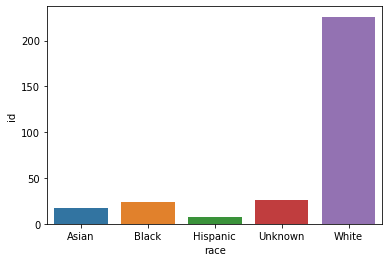

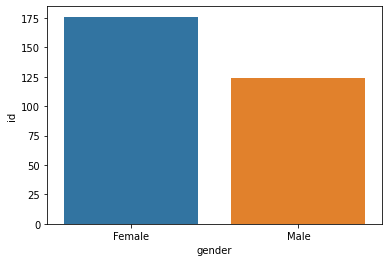

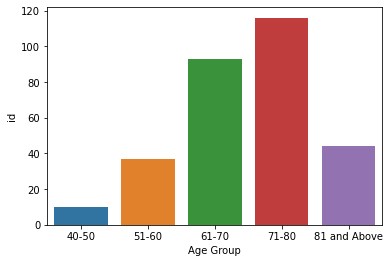

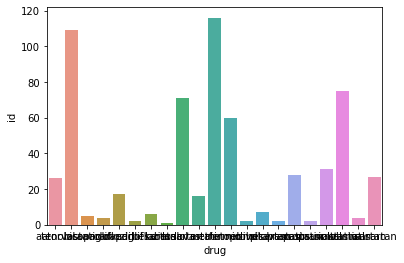

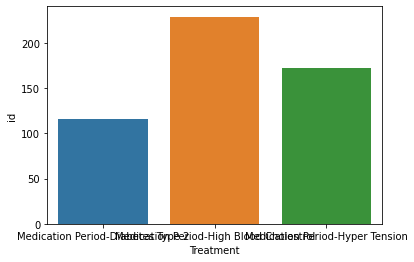

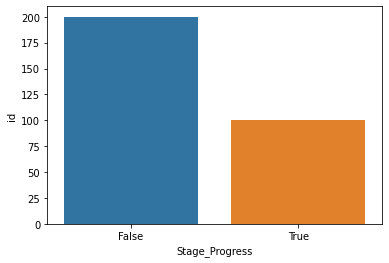

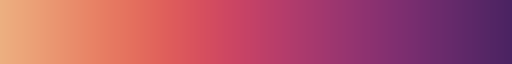

In [8]:
dframe_temp=dframe_demographics.merge(dframe_target,how='inner',on='id')



my_internal_func.my_hist_by_category(dframe_demo_with_medication,target='id')


dframe_progression_rate=pd.DataFrame(dframe_temp.groupby('Age Group',as_index=False).agg({'id':pd.Series.nunique,'target': sum}))
dframe_progression_rate.columns=['Age Group','Patient Count','Progress Count']
dframe_progression_rate['Progression Rate']=100*dframe_progression_rate['Progress Count']/sum(dframe_progression_rate['Progress Count'])
dframe_progression_rate=dframe_progression_rate.sort_values('Progression Rate',ascending=False)
sns.color_palette("flare", as_cmap=True)

# plt.figure(figsize=(10,6))
# ax=sns.barplot('Progression Rate','Age Group',data=dframe_progression_rate)
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[0], fmt='%.0f%%')
# plt.xlabel("Rate of Progression", size=15)
# plt.ylabel("Age", size=15)
# plt.title("Age wise Progression of Kidney Disease", size=18)
# plt.tight_layout()
# plt.show()

<Figure size 1440x1440 with 0 Axes>

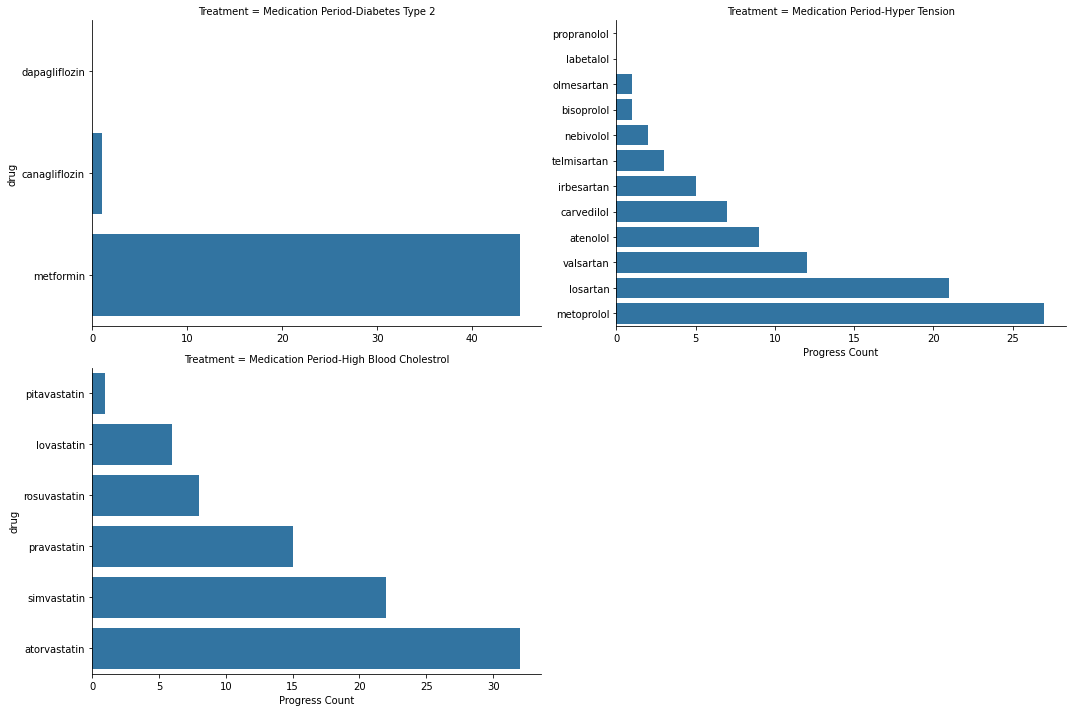

In [9]:
dframe_progression_rate=pd.DataFrame(dframe_demo_with_medication.groupby(['id','Treatment','drug'],as_index=False).agg({'target':max}))
dframe_progression_rate=pd.DataFrame(dframe_progression_rate.groupby(['Treatment','drug'],as_index=False).agg({'id':pd.Series.nunique,'target': sum}))
dframe_progression_rate.columns=['Treatment','drug','Patient Count','Progress Count']
dframe_progression_rate['Progression Rate']=100*dframe_progression_rate['Progress Count']/sum(dframe_progression_rate['Progress Count'])
dframe_progression_rate=dframe_progression_rate.sort_values('Progress Count',ascending=True)
sns.color_palette("flare", as_cmap=True)

plt.figure(figsize=(20,20))
g = sns.FacetGrid(dframe_progression_rate, col='Treatment', sharex=False, sharey=False, col_wrap=2, height=5, aspect=1.5)
g.map_dataframe(sns.barplot, x='Progress Count', y='drug')


## 3. Data Engineering and Scaling

#### <font color='grey'>Feature Store Creation</font>

In [10]:
# Extracting medication history

dframe_medication_temp=pd.DataFrame(dframe_demo_with_medication.groupby(['id','Treatment'],as_index=False)['Medication Duration (days)'].sum())

dframe_medication_temp_pivot=pd.pivot_table(dframe_medication_temp,
                                            index='id',
                                            columns='Treatment',
                                            values='Medication Duration (days)',
                                            aggfunc=max).reset_index()




for col in ['Medication Period-Diabetes Type 2','Medication Period-High Blood Cholestrol','Medication Period-Hyper Tension']:
    dframe_medication_temp_pivot[col]= dframe_medication_temp_pivot[col].apply(lambda x: 1 if x>0 else 0)

    
    # Extracting duration of observation period
dframe_demo_alltestresults['t=n']=dframe_demo_alltestresults.groupby(['id'])['time'].transform(max)

dframe_start_time=dframe_demo_alltestresults[dframe_demo_alltestresults['time']==0]

dframe_latest_time=dframe_demo_alltestresults[dframe_demo_alltestresults['time']==dframe_demo_alltestresults['t=n']]

dframe_Delta=dframe_start_time[['id','time','Creatinine','HGB','SBP','Glucose','Lipoprotein']].merge(dframe_latest_time[['id','time','Creatinine','HGB','SBP','Glucose','Lipoprotein']],how='inner',on='id')
dframe_Delta.to_csv('output/Delta.csv')
list_colnames=['id']
for col in ['Creatinine','SBP','HGB','Glucose','Lipoprotein']:
   
    dframe_Delta[col+'_baseline']=round(dframe_Delta[col+'_x'],1)
    dframe_Delta[col+'_lastObs']=round(dframe_Delta[col+'_y'],1)
    list_colnames.extend([col+'_baseline',col+'_lastObs'])

print(len(dframe_Delta.id.unique()))

300


In [11]:
# The longitudinal data needs to be aggregated in a way so that the crucial information is still retained.



# The remaining static information is kep as ist

original_columns=['id','race','gender','Age Group',
                  'target']

        
dict_feature_Operations= {  'time': lambda x: x.max()-x.min(),
                             'CKD(t=0)':sum,
                             'Dieabetes(t=0)':sum,
                             'Cholestrol(t=0)':sum,
                             'Hyper Tension(t=0)':sum,
                              'Hemoglobin(t=0)':sum,
                              'Cholestrol(t=0)':sum
                            
                         }


dframe_deltaTestResults=dframe_demo_alltestresults.groupby(original_columns,as_index=False).agg(dict_feature_Operations).merge(dframe_Delta[list_colnames],on='id',how='inner')
print(dframe_deltaTestResults.shape)
dframe_final=dframe_deltaTestResults.merge(dframe_medication_temp_pivot,on='id',how='left')
dframe_final.fillna(0).to_csv(r'output/Prediction_Ready.csv',index=False)
dframe_final=dframe_final.fillna(0)
print(dframe_final.shape)
print(len(dframe_final.id.unique()))

dframe_final


(300, 21)
(300, 24)
300


,id,race,gender,Age Group,target,time,CKD(t=0),Dieabetes(t=0),Cholestrol(t=0),Hyper Tension(t=0),...,SBP_lastObs,HGB_baseline,HGB_lastObs,Glucose_baseline,Glucose_lastObs,Lipoprotein_baseline,Lipoprotein_lastObs,Medication Period-Diabetes Type 2,Medication Period-High Blood Cholestrol,Medication Period-Hyper Tension
0,0,Unknown,Male,61-70,1,1196,3.0,0,1,1,...,147.5,13.5,13.1,6.2,5.8,161.5,157.9,1.0,1.0,1.0
1,1,White,Female,71-80,0,1394,4.0,1,0,0,...,149.7,13.9,12.8,10.0,9.8,89.6,73.2,0.0,1.0,0.0
2,2,White,Female,51-60,1,1254,4.0,1,0,1,...,136.5,15.3,15.2,7.2,7.0,61.6,87.1,0.0,1.0,0.0
3,3,White,Male,71-80,0,1414,1.0,0,0,1,...,142.9,13.7,12.7,6.4,5.8,99.7,101.4,0.0,1.0,0.0
4,4,White,Female,40-50,1,1080,3.0,1,0,0,...,166.4,13.2,11.6,8.8,11.0,65.7,72.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,White,Female,71-80,1,1157,4.0,0,1,1,...,134.8,13.7,14.3,6.5,5.8,111.7,123.8,0.0,0.0,0.0
296,296,White,Female,61-70,0,1159,4.0,1,1,0,...,143.2,15.2,15.3,7.2,7.9,100.4,91.8,1.0,1.0,0.0
297,297,Unknown,Male,71-80,1,1008,3.0,1,1,0,...,136.8,14.0,14.4,8.3,9.6,135.0,152.1,1.0,1.0,1.0
298,298,Asian,Female,71-80,0,877,3.0,0,0,1,...,133.4,15.3,17.2,6.4,6.0,79.1,62.1,1.0,1.0,0.0


In [12]:
feature_set1=['race','gender','Age Group']
feature_set2= ['CKD(t=0)','Dieabetes(t=0)','Cholestrol(t=0)','Hyper Tension(t=0)','Hemoglobin(t=0)']
feature_set3=['Glucose_baseline','Lipoprotein_baseline','SBP_baseline','HGB_baseline','Creatinine_baseline',
             'Glucose_lastObs','Lipoprotein_lastObs','SBP_lastObs','HGB_lastObs','Creatinine_lastObs']
feature_set4=['Medication Period-Diabetes Type 2','Medication Period-High Blood Cholestrol','Medication Period-Hyper Tension']

target='target'

for f in feature_set1:
    dframe_final[f]=dframe_final[f].astype('object')
for f in feature_set2:
    dframe_final[f]=dframe_final[f].astype('object')
for f in feature_set4:
    dframe_final[f]=dframe_final[f].astype('object')


    
predictors=list()
for f in [feature_set1,feature_set2,feature_set3,feature_set4]:
    for item in f:
        predictors.append(item)
        
print(predictors)
# my_internal_func.my_plot(dframe_final[predictors])

['race', 'gender', 'Age Group', 'CKD(t=0)', 'Dieabetes(t=0)', 'Cholestrol(t=0)', 'Hyper Tension(t=0)', 'Hemoglobin(t=0)', 'Glucose_baseline', 'Lipoprotein_baseline', 'SBP_baseline', 'HGB_baseline', 'Creatinine_baseline', 'Glucose_lastObs', 'Lipoprotein_lastObs', 'SBP_lastObs', 'HGB_lastObs', 'Creatinine_lastObs', 'Medication Period-Diabetes Type 2', 'Medication Period-High Blood Cholestrol', 'Medication Period-Hyper Tension']


## 4. Pre-cursory data adjustments for modelling

#### <font color='green'> Outlier Treatment</font>

Original data:(300, 10)


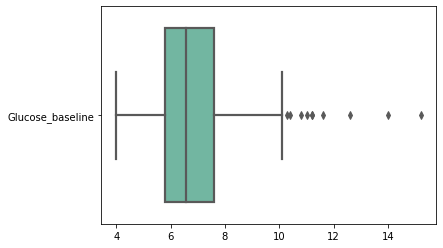

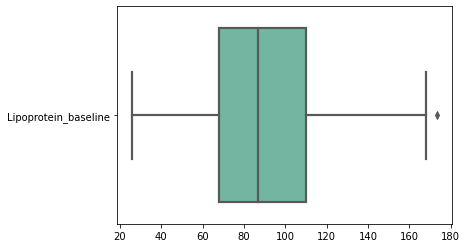

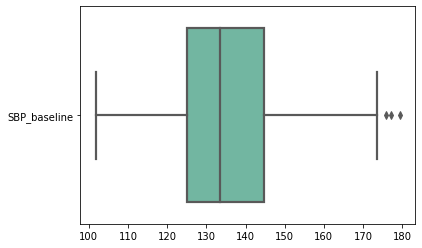

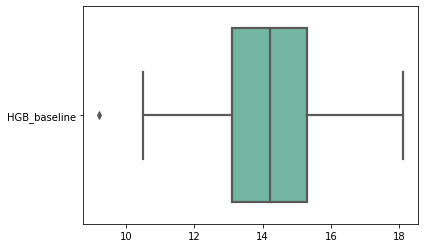

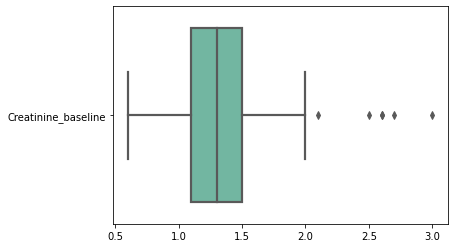

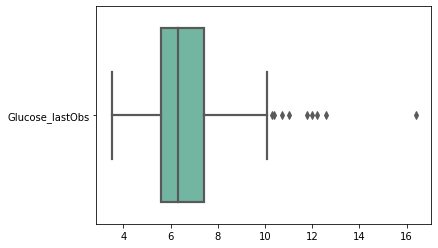

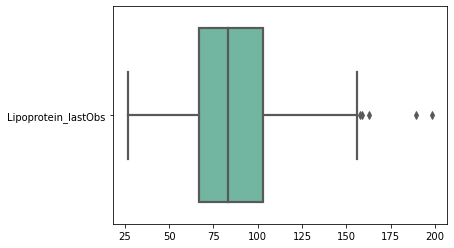

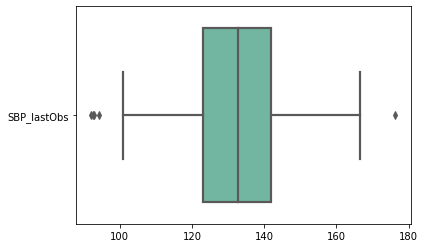

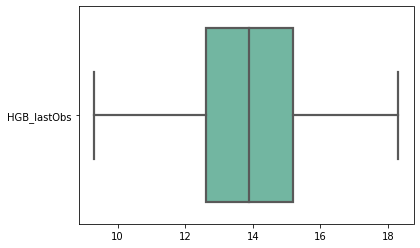

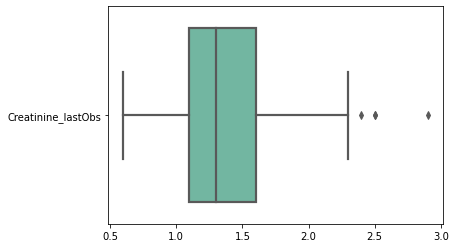


Removal of outliers==== 0
Shape of new dataframe  (300, 10)


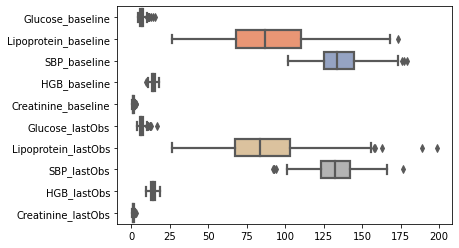

In [13]:
outlier_pos,dframe_outlierRemoved=my_internal_func.my_outlier_flagbyZscore(dframe_final[predictors])

#### <font color='green'> Class Imbalance</font>

In [14]:
print(dframe_final.groupby(['target'],as_index=False)['id'].nunique())

# Imbalance of data is handled by assigning class weights to the models.
# Oversampling is avoided as it will not add any information value
idx_0=dframe_final[dframe_final['target']==0].sample(100,random_state=0).index
idx_1=dframe_final[dframe_final['target']==1].index

dframe_outlierremoved_balanced=dframe_final[~dframe_final.index.isin(outlier_pos)]

   target   id
0       0  200
1       1  100


In [15]:
# Set Index
my_internal_func.my_missing_values_table(dframe_outlierremoved_balanced)
del(dframe_outlierremoved_balanced['time'])
dframe_outlierremoved_balanced=dframe_outlierremoved_balanced.set_index('id')
print(dframe_outlierremoved_balanced.shape)

id                                           int64
race                                        object
gender                                      object
Age Group                                   object
target                                       int64
time                                         int64
CKD(t=0)                                    object
Dieabetes(t=0)                              object
Cholestrol(t=0)                             object
Hyper Tension(t=0)                          object
Hemoglobin(t=0)                             object
Creatinine_baseline                        float64
Creatinine_lastObs                         float64
SBP_baseline                               float64
SBP_lastObs                                float64
HGB_baseline                               float64
HGB_lastObs                                float64
Glucose_baseline                           float64
Glucose_lastObs                            float64
Lipoprotein_baseline           

#### <font color='green'> Scaling of Data</font>

In [16]:
# Standard scaling on numerical data 


dframe_outlierremoved_balanced_scaled=my_internal_func.my_preprocess(dframe_outlierremoved_balanced,'standard',ignore=['target'])
dframe_outlierremoved_balanced_scaled


 Original shape of dataframe-----> (300, 22)
race                                        object
gender                                      object
Age Group                                   object
target                                       int64
CKD(t=0)                                    object
Dieabetes(t=0)                              object
Cholestrol(t=0)                             object
Hyper Tension(t=0)                          object
Hemoglobin(t=0)                             object
Creatinine_baseline                        float64
Creatinine_lastObs                         float64
SBP_baseline                               float64
SBP_lastObs                                float64
HGB_baseline                               float64
HGB_lastObs                                float64
Glucose_baseline                           float64
Glucose_lastObs                            float64
Lipoprotein_baseline                       float64
Lipoprotein_lastObs                 

,Creatinine_baseline,Creatinine_lastObs,Glucose_baseline,Glucose_lastObs,HGB_baseline,HGB_lastObs,Lipoprotein_baseline,Lipoprotein_lastObs,SBP_baseline,SBP_lastObs,...,Cholestrol(t=0),Dieabetes(t=0),Hemoglobin(t=0),Hyper Tension(t=0),Medication Period-Diabetes Type 2,Medication Period-High Blood Cholestrol,Medication Period-Hyper Tension,gender,race,target
0,-0.026022,-0.389869,-0.392190,-0.551095,-0.375755,-0.430711,2.527166,2.551382,-0.020086,1.000331,...,1,0,0,1,1,1,1,1,3,1
1,1.130516,2.421685,2.046961,1.974931,-0.119121,-0.605167,-0.021326,-0.454071,1.604377,1.150067,...,0,1,0,0,0,1,0,0,4,0
2,3.443592,2.421685,0.249692,0.206713,0.779098,0.790478,-1.013785,0.039150,-0.103392,0.251648,...,0,1,0,1,0,1,0,0,4,1
3,-1.760829,-1.233335,-0.263813,-0.551095,-0.247438,-0.663319,0.336668,0.546564,0.910162,0.687245,...,0,0,0,1,0,1,0,1,4,0
4,-0.026022,-1.233335,1.276703,2.732739,-0.568230,-1.302989,-0.868461,-0.496651,-0.388020,2.286704,...,0,1,0,0,1,1,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.708785,0.734753,-0.199625,-0.551095,-0.247438,0.267111,0.762008,1.341395,1.167022,0.135943,...,1,0,0,1,0,0,0,0,4,1
296,1.708785,0.172442,0.249692,0.775069,0.714939,0.848629,0.361479,0.205923,0.368674,0.707664,...,1,1,0,0,1,1,0,0,4,0
297,-0.315157,-0.108713,0.955762,1.848630,-0.054962,0.325263,1.587875,2.345578,0.778261,0.272067,...,1,1,0,0,1,1,1,1,3,1
298,-0.893426,-0.952179,-0.263813,-0.424793,0.779098,1.953515,-0.393498,-0.847937,0.361732,0.040656,...,0,0,0,1,1,1,0,0,0,0


#### <font color='green'> Inspect weight of Evidence and Information Value</font>

In [17]:
# Inspect Information Value

# print(dframe_outlierremoved_balanced.info())

import MyInformationValue as my_iv

featureset_first= ['race', 'gender', 'Age Group',
                   'CKD(t=0)', 'Dieabetes(t=0)', 'Cholestrol(t=0)', 'Hyper Tension(t=0)', 'Hemoglobin(t=0)',
                    'Glucose_baseline', 'Lipoprotein_baseline', 'SBP_baseline', 'HGB_baseline', 
                   'Medication Period-Diabetes Type 2', 'Medication Period-High Blood Cholestrol', 'Medication Period-Hyper Tension']


final_iv,IV=my_iv.data_vars(dframe_outlierremoved_balanced[featureset_first],dframe_outlierremoved_balanced.target)
final_iv.to_csv('output/InformationValue_1.csv')
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
1,CKD(t=0),0.366782
5,HGB_baseline,0.204297
13,gender,0.198980
6,Hemoglobin(t=0),0.109971
12,SBP_baseline,0.073501
8,Lipoprotein_baseline,0.058709
0,Age Group,0.038612
9,Medication Period-Diabetes Type 2,0.037664
11,Medication Period-Hyper Tension,0.029897
14,race,0.022637


In [18]:
new_reduced_feature=['gender', 'Age Group',
                   'CKD(t=0)', 'Dieabetes(t=0)', 'Cholestrol(t=0)', 'Hyper Tension(t=0)', 'Hemoglobin(t=0)',
                    'Glucose_lastObs', 'Lipoprotein_lastObs', 'SBP_lastObs', 'HGB_lastObs', 
                     'Medication Period-Diabetes Type 2', 'Medication Period-High Blood Cholestrol', 'Medication Period-Hyper Tension'
                   ]
                     
final_iv,IV=my_iv.data_vars(dframe_outlierremoved_balanced[new_reduced_feature],dframe_outlierremoved_balanced.target)
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
1,CKD(t=0),0.366782
13,gender,0.198980
12,SBP_lastObs,0.184565
4,Glucose_lastObs,0.169468
5,HGB_lastObs,0.164081
6,Hemoglobin(t=0),0.109971
8,Lipoprotein_lastObs,0.101544
0,Age Group,0.038612
9,Medication Period-Diabetes Type 2,0.037664
11,Medication Period-Hyper Tension,0.029897


In [19]:
final_iv.to_csv('output/InformationValue_2.csv')
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,gender,Female,Female,176,44,0.250000,132,0.750000,0.44,0.660,-0.405465,0.198980
1,gender,Male,Male,124,56,0.451613,68,0.548387,0.56,0.340,0.498991,0.198980
2,Age Group,40-50,40-50,10,4,0.400000,6,0.600000,0.04,0.030,0.287682,0.038612
3,Age Group,51-60,51-60,37,14,0.378378,23,0.621622,0.14,0.115,0.196710,0.038612
4,Age Group,61-70,61-70,93,35,0.376344,58,0.623656,0.35,0.290,0.188052,0.038612
5,Age Group,71-80,71-80,116,35,0.301724,81,0.698276,0.35,0.405,-0.145954,0.038612
6,Age Group,81 and Above,81 and Above,44,12,0.272727,32,0.727273,0.12,0.160,-0.287682,0.038612
7,CKD(t=0),1.0,1.0,17,8,0.470588,9,0.529412,0.08,0.045,0.575364,0.366782
8,CKD(t=0),2.0,2.0,71,31,0.436620,40,0.563380,0.31,0.200,0.438255,0.366782
9,CKD(t=0),3.0,3.0,85,32,0.376471,53,0.623529,0.32,0.265,0.188591,0.366782


In [20]:
transform_prefix = 'new_'
transform_vars_list=new_reduced_feature
print(transform_vars_list)

for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            dframe_outlierremoved_balanced[transform_prefix + var] = dframe_outlierremoved_balanced[var].apply(lambda x: eval(replace_cmd))
        except:
            dframe_outlierremoved_balanced[transform_prefix + var] = dframe_outlierremoved_balanced[var].apply(lambda x: eval(replace_cmd1))
            


['gender', 'Age Group', 'CKD(t=0)', 'Dieabetes(t=0)', 'Cholestrol(t=0)', 'Hyper Tension(t=0)', 'Hemoglobin(t=0)', 'Glucose_lastObs', 'Lipoprotein_lastObs', 'SBP_lastObs', 'HGB_lastObs', 'Medication Period-Diabetes Type 2', 'Medication Period-High Blood Cholestrol', 'Medication Period-Hyper Tension']


In [21]:
dframe_outlierremoved_balanced.to_csv('output/Prediction-with-WOE.csv')
dframe_outlierremoved_balanced.head(10)


,race,gender,Age Group,target,CKD(t=0),Dieabetes(t=0),Cholestrol(t=0),Hyper Tension(t=0),Hemoglobin(t=0),Creatinine_baseline,...,new_Cholestrol(t=0),new_Hyper Tension(t=0),new_Hemoglobin(t=0),new_Glucose_lastObs,new_Lipoprotein_lastObs,new_SBP_lastObs,new_HGB_lastObs,new_Medication Period-Diabetes Type 2,new_Medication Period-High Blood Cholestrol,new_Medication Period-Hyper Tension
id,,,,,,,,,,,,,,,,,,,,,
0,Unknown,Male,61-70,1,3.0,0,1,1,0,1.3,...,-0.188052,-0.184922,-0.184734,-0.194156,0.451985,0.169899,0.097164,0.237130,0.013072,0.144934
1,White,Female,71-80,0,4.0,1,0,0,0,1.7,...,0.088293,0.100471,-0.184734,0.665748,-0.089612,0.832909,0.097164,-0.159332,0.013072,-0.206794
2,White,Female,51-60,1,4.0,1,0,1,0,2.5,...,0.088293,-0.184922,-0.184734,-0.122602,0.060625,0.105361,-0.322773,-0.159332,0.013072,-0.206794
3,White,Male,71-80,0,1.0,0,0,1,0,0.7,...,0.088293,-0.184922,-0.184734,-0.194156,0.203599,0.169899,0.097164,-0.159332,0.013072,-0.206794
4,White,Female,40-50,1,3.0,1,0,0,0,1.3,...,0.088293,0.100471,-0.184734,0.665748,-0.125163,0.832909,0.563094,0.237130,0.013072,0.144934
5,Black,Male,71-80,0,3.0,0,0,0,1,1.5,...,0.088293,0.100471,0.600774,-0.122602,-0.125163,-0.500775,0.563094,-0.159332,0.013072,0.144934
6,White,Female,51-60,0,4.0,1,0,0,0,1.8,...,0.088293,0.100471,-0.184734,-0.122602,-0.597837,0.832909,-0.485508,-0.159332,0.013072,0.144934
7,Asian,Female,61-70,0,3.5,0,1,0,0,1.4,...,-0.188052,0.100471,-0.184734,-0.194156,0.451985,-0.500775,-0.485508,-0.159332,0.013072,0.144934
8,White,Female,61-70,1,4.0,0,1,0,0,2.0,...,-0.188052,0.100471,-0.184734,-0.405465,0.451985,0.169899,-0.485508,-0.159332,0.013072,0.144934


### 4.Predictive Modelling

Methodology : The approach towards modelling is two phased. First a simple logistic regression model is built with features selected by scanning the IV\WOE results above.
An advanced approach will consider the longitudunal data

#### <font color='green'> Simple Approach : Logistic Regression \ Random Forest</font>

In [22]:
# dframe_outlierremoved_balanced.to_csv('output/dframe_outlierremoved_balanced.csv')

import MyClassifierToolSet as my_clf

features=[ 
           'new_gender','new_Age Group',
           'new_CKD(t=0)','new_Hemoglobin(t=0)',
           
            'new_Glucose_lastObs', 'new_Lipoprotein_lastObs', 'new_SBP_lastObs', 'new_HGB_lastObs',
              
         ]

target='target'  #'new_Lipoprotein_delta'
# Inspect p values
dframe_target=dframe_outlierremoved_balanced[target][dframe_outlierremoved_balanced.index.isin(idx_0) | dframe_outlierremoved_balanced.index.isin(idx_1)]
dframe_features=dframe_outlierremoved_balanced[features][dframe_outlierremoved_balanced.index.isin(idx_0) | dframe_outlierremoved_balanced.index.isin(idx_1)]

import statsmodels.api as sm
logit_model=sm.Logit(dframe_target,dframe_features)
result=logit_model.fit()
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.559579
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  200
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.1927
Time:                        20:59:11   Log-Likelihood:                -111.92
converged:                       True   LL-Null:                       -138.63
Covariance Type:            nonrobust   LLR p-value:                 3.053e-09
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
new_gender                  0.7845      0.469      1.672      0.095      -0.135   


 Training Records  and Test Records [140, 60]

 minority observation in test data
1    32
0    28
Name: target, dtype: int64



Optimization terminated successfully.
         Current function value: 0.547620
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  140
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                            5
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.2095
Time:                        20:59:11   Log-Likelihood:                -76.667
converged:                       True   LL-Null:                       -96.983
Covariance Type:            nonrobust   LLR p-value:                 1.113e-07
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

Loading BokehJS ...

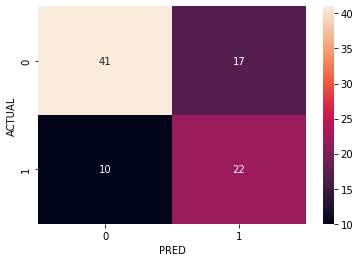

---------Performance on minority class on test data------------------

Precision: 0.564103
Recall: 0.687500
F1 score: 0.619718


In [23]:


features=[ 
           'new_gender',
           'new_CKD(t=0)',          
            'new_Glucose_lastObs', 'new_Lipoprotein_lastObs', 'new_SBP_lastObs', 'new_HGB_lastObs'
         ]

# Inspect p values



dframe_sm=dframe_outlierremoved_balanced[dframe_outlierremoved_balanced.index.isin(idx_0) | dframe_outlierremoved_balanced.index.isin(idx_1)]



train, test = train_test_split(dframe_sm,test_size = 0.30,random_state=42)
train = train.reset_index()
test = test.reset_index()
print ('\n Training Records  and Test Records',[len(train),len(test)])
print('\n minority observation in test data')
print(test[target].value_counts())
print('\n\n')

features_train = train[features]
label_train = train[target]
features_test = test[features]
label_test = test[target]


import statsmodels.api as sm
logit_model=sm.Logit(label_train,features_train)
result=logit_model.fit()
print(result.summary())
pred_test=result.predict(features_test)
pred_test = list(map(round, pred_test))
print('----------------Test data Performance-----------------------\n')
# precision tp / (tp + fp)
precision = precision_score(label_test, pred_test )
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(label_test, pred_test )
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(label_test, pred_test )
print('F1 score: %f' % f1)



# SKlearn
classifier=my_clf.my_LogRegClassifier(dframe_outlierremoved_balanced,features,target)

#### <font color='green'> Feature Importance</font>

[[0.34275139 0.65311536 0.82747712 1.01319006 0.9153672  0.92286741]]




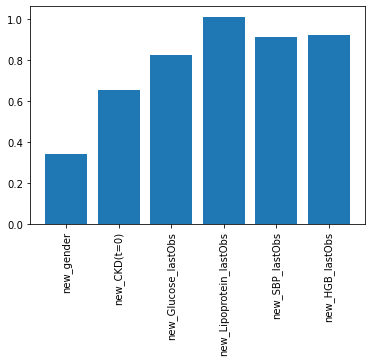

,Feature,coeff,effect %,direction
0,new_Lipoprotein_lastObs,1.013190,0.216736,1
1,new_HGB_lastObs,0.922867,0.197415,1
2,new_SBP_lastObs,0.915367,0.195810,1
3,new_Glucose_lastObs,0.827477,0.177009,1
4,new_CKD(t=0),0.653115,0.139711,1
5,new_gender,0.342751,0.073319,1


In [24]:
print(classifier.coef_)
print('\n')
dframe_coff=pd.DataFrame()
dframe_coff['Feature']=features
dframe_coff['coeff']=classifier.coef_[0]
dframe_coff['effect % ']=dframe_coff['coeff'].apply(lambda x: abs(x)/sum(abs(dframe_coff['coeff'])))
dframe_coff['direction']=dframe_coff['coeff'].apply(lambda x: +1 if x>0 else 0 if x==0 else -1)
from matplotlib.pyplot import figure


plt.bar(dframe_coff['Feature'],dframe_coff['coeff'])
plt.xticks(range(len(features)),features, rotation=90)
plt.show()

dframe_coff.sort_values('effect % ',ascending=False).reset_index(drop=True).head(20)

Fitting 2 folds for each of 10 candidates, totalling 20 fits



 Accuracy Train ------- Accuracy Test------------ AUC Train-------AUC Test--------
0.8380952380952381 0.6666666666666666 0.9209299917149959 0.6931573275862069
Precision: 0.531250
Recall: 0.531250


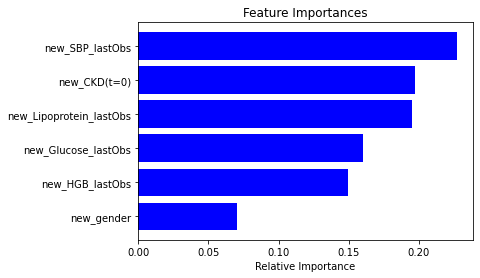

In [25]:
features=[ 
           'new_gender',
           'new_CKD(t=0)',          
            'new_Glucose_lastObs', 'new_Lipoprotein_lastObs', 'new_SBP_lastObs', 'new_HGB_lastObs'
         ]
         
classifier=my_clf.my_RFClassifier(dframe_outlierremoved_balanced,features,target)

#### <font color='grey'> Advanced Approach(Deep Learning)</font>

The recall value of the linear model(s) are moderate. The linear models have determined the most influencial predictors. The same can be used in LSTM model keeping the longitudinal data nature intact. This will be attempted on the part 2 analysis

### Conclusions

The top predictors of the CKD prediction have been consistently identified by a number of classifiers. The relative importance vary slightly among each model. However, the bigger picture is to identify the top  influencers. the relative ranking is not so much of business importance.

Using the weight of evidence\ Information values one could identify a approximate cutoff value for each gluscose\ cholestrol etc levels beyond which the increase in chances of a disease progression surge up. More on this on the presentations